# Starting Kit - FAIR UNIVERSE: HIGGSML UNCERTAINTY CHALLENGE

For Overview and Decriptions of the competition, please visit the competition page

## Setup
`COLAB` determines whether this notebook is running on Google Colab.

In [1]:
COLAB = 'google.colab' in str(get_ipython())

In [2]:
if COLAB:
    %pip install HiggsML
    ! git clone https://github.com/blackSwanCS/Collaboration_A 
    %cd Collaboration_A


In [3]:
TEST_SETTINGS = {
"systematics": {  # Systematics to use
    "tes": True, # tau energy scale
    "jes": False, # jet energy scale
    "soft_met": False, # soft term in MET
    "w_scale": False, # W boson scale factor
    "bkg_scale": False, # Background scale factor
    },
"num_pseudo_experiments" : 2 , # Number of pseudo-experiments to run per set
"num_of_sets" : 5, # Number of sets of pseudo-experiments to run
} 

USE_RANDOM_MUS = True

### Imports

In [4]:
from sys import path
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from itertools import product
from numpy.random import RandomState
import warnings
import os
import sys
warnings.filterwarnings("ignore")

### Directories

In [5]:

root_dir = os.getcwd()
print("Root directory is", root_dir)

input_dir = os.path.join(root_dir, "sample_data")
output_dir = os.path.join(root_dir, "sample_result_submission")
submission_dir = os.path.join(root_dir, "sample_code_submission")
score_dir = os.path.join(root_dir, "scoring_program")
    
test_settings = TEST_SETTINGS.copy()

if USE_RANDOM_MUS:
    test_settings[ "ground_truth_mus"] = (np.random.uniform(0.1, 3, test_settings["num_of_sets"])).tolist()
    
    random_settings_file = os.path.join(output_dir, "random_mu.json")
    with open(random_settings_file, "w") as f:
        json.dump(test_settings, f)
else:
    test_settings_file = os.path.join(input_dir, "test", "settings", "data.json")
    with open(test_settings_file) as f:
        test_settings = json.load(f)


Root directory is /home/chakkappai/Work/ST4_CS/Collaboration_A



### Add directories to path

In [6]:
path.append(submission_dir)
path.append(score_dir)

In [7]:
import HiggsML.visualization as visualization

## Import Submission Model
We import a class named `Model` from the submission file (`model.py`). This `Model` class has the following methods:
- `init`: receives train set and systematics class as input
- `fit`: can be used for training
- `predict`: receives one test set and outputs a dictionary with the following keys
    - `mu_hat` : predicted mu $\hat{\mu}$
    - `delta_mu_hat`: $\Delta{\hat{\mu}}$ bound for $\mu$
    - `p16`: 16th percentile
    - `p84`: 84th percentile

In this example code, the `Model` class implements an XGBoost model which is trained to predict both the TES and the class label. You can find the code in `HEP-Challenge/sample_code_submission/model.py`. You can modify it the way you want, keeping the required class structure and functions there. More instructions are given inside the `model.py` file. If running in Collab, click the folder icon in the left sidebar to open the file browser.

### ⚠️ Note:
In real setting i.e. the challenge itself, the submitted model is initialized once with train set and systematics class and the `predict` is called multiple times, each time with a different test sets. 

In [8]:
from model import Model

***
## Data
***

### ⚠️ Note:
The data used here is a small sample data is for demonstration only to get a view of what the data looks like. 

`USE_PUBLIC_DATASET` determines whether to use a public dataset provided for the participants or use a small sample datafor quick execution of this notebook

In [9]:
USE_PUBLIC_DATASET = True

`USE_PUBLIC_DATASET` determines whether to use a public dataset provided for the participants or use a small subset of the data for quick execution of this notebook

In [10]:
if USE_PUBLIC_DATASET:
    from HiggsML.datasets import BlackSwan_public_dataset as public_dataset
    data = public_dataset()
else:
    data = Data(input_dir)

The function loads the downloaded data in the public_data folder or downloads the data from codabench using `wget` in the absence of the downloaded data, 

In [11]:
# load train set
data.load_train_set()

[*] Loading Train data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5092469 entries, 0 to 5092468
Columns: 16 entries, PRI_lep_pt to PRI_met_phi
dtypes: float32(16)
memory usage: 310.8 MB
None
[*] Train data loaded successfully


In [12]:
# load test sets
data.load_test_set()

[*] Loading Test data
[*] Test data loaded successfully


***
# Visualize
***
- Visualize Train set

In [13]:
train_visualize = visualization.Dataset_visualise(
    data_set=data.get_train_set(),
    columns=[
        "PRI_jet_leading_pt",
        "PRI_met",
        "PRI_lep_phi",
        "PRI_had_eta",
    ],
    name="Train Set",
)

In [14]:
# Show data summary
train_visualize.examine_dataset()

[*] --- Dataset name : Train Set
[*] --- Number of events : 5092469
[*] --- Number of features : 16
   diboson   40589.999999999985
   htautau   3638.9999999999995
   ttbar   158761.0
   wjets   710190.0
   ztautau   823327.000000002
[*] --- Number of signal events : 4233398
[*] --- Number of background events : 859071
[*] --- Examples of all features


,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_had_pt,PRI_had_eta,PRI_had_phi,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_n_jets,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,PRI_met,PRI_met_phi
0,33.716999,-0.009,-1.614,42.567001,0.391,1.512,42.567001,0.391,1.512,-7.000000,-7.000,-7.000,-7.0,42.567001,18.089001,-2.276
1,39.069000,-0.382,2.876,45.743000,0.369,-0.165,45.743000,0.369,-0.165,-7.000000,-7.000,-7.000,-7.0,45.743000,11.859000,0.983
2,26.211000,0.736,-2.294,43.819000,0.565,0.889,43.819000,0.565,0.889,-7.000000,-7.000,-7.000,-7.0,43.819000,8.625000,-0.087
3,55.631001,-0.277,1.425,46.077999,0.190,-1.295,49.319000,1.085,3.036,46.077999,0.190,-1.295,-1.0,95.397003,33.098999,-0.798
4,96.626999,0.548,2.112,64.114998,-2.041,-2.114,64.114998,-2.041,-2.114,24.503000,-0.549,-0.182,1.0,88.617996,36.653000,0.112


[*] --- Description of all features


,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_had_pt,PRI_had_eta,PRI_had_phi,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_n_jets,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,PRI_met,PRI_met_phi
count,5.092469e+06,5.092469e+06,5.092469e+06,5.092469e+06,5.092469e+06,5.092469e+06,5.092469e+06,5.092469e+06,5.092469e+06,5.092469e+06,5.092469e+06,5.092469e+06,5.092469e+06,5.092469e+06,5.092469e+06,5.092469e+06
mean,4.003889e+01,3.858527e-04,1.411100e-03,5.060156e+01,-2.031973e-04,4.236645e-05,7.440759e+01,-4.607605e-04,-5.000156e-04,3.284827e+01,-2.396695e+00,-2.394841e+00,-2.391500e+00,1.353792e+02,3.529773e+01,4.084664e-04
std,2.391802e+01,1.173759e+00,1.813462e+00,2.758819e+01,1.204013e+00,1.813305e+00,5.838182e+01,1.548444e+00,1.812557e+00,4.031150e+01,3.648207e+00,3.631156e+00,3.432812e+00,1.260422e+02,3.613332e+01,1.812719e+00
min,2.000000e+01,-2.500000e+00,-3.142000e+00,2.285000e+01,-2.688000e+00,-3.142000e+00,2.287800e+01,-4.962000e+00,-3.142000e+00,-7.000000e+00,-7.000000e+00,-7.000000e+00,-9.000000e+00,2.287800e+01,4.000000e-03,-3.142000e+00
25%,2.583700e+01,-8.920000e-01,-1.569000e+00,3.388300e+01,-9.250000e-01,-1.570000e+00,4.106400e+01,-1.115000e+00,-1.572000e+00,-7.000000e+00,-7.000000e+00,-7.000000e+00,-7.000000e+00,5.101600e+01,1.367700e+01,-1.570000e+00
50%,3.332000e+01,0.000000e+00,2.000000e-03,4.432200e+01,-1.000000e-03,0.000000e+00,5.536500e+01,-2.000000e-03,-1.000000e-03,3.107000e+01,-1.370000e+00,-1.631000e+00,-1.000000e+00,9.081100e+01,2.442200e+01,0.000000e+00
75%,4.544400e+01,8.930000e-01,1.573000e+00,5.823600e+01,9.250000e-01,1.570000e+00,8.352900e+01,1.114000e+00,1.570000e+00,5.052200e+01,5.960000e-01,7.760000e-01,0.000000e+00,1.760850e+02,4.313600e+01,1.571000e+00
max,1.261630e+03,2.500000e+00,3.142000e+00,1.260630e+03,2.728000e+00,3.142000e+00,1.509400e+03,4.962000e+00,3.142000e+00,1.276360e+03,4.998000e+00,3.142000e+00,1.000000e+01,3.542470e+03,1.242130e+03,3.142000e+00


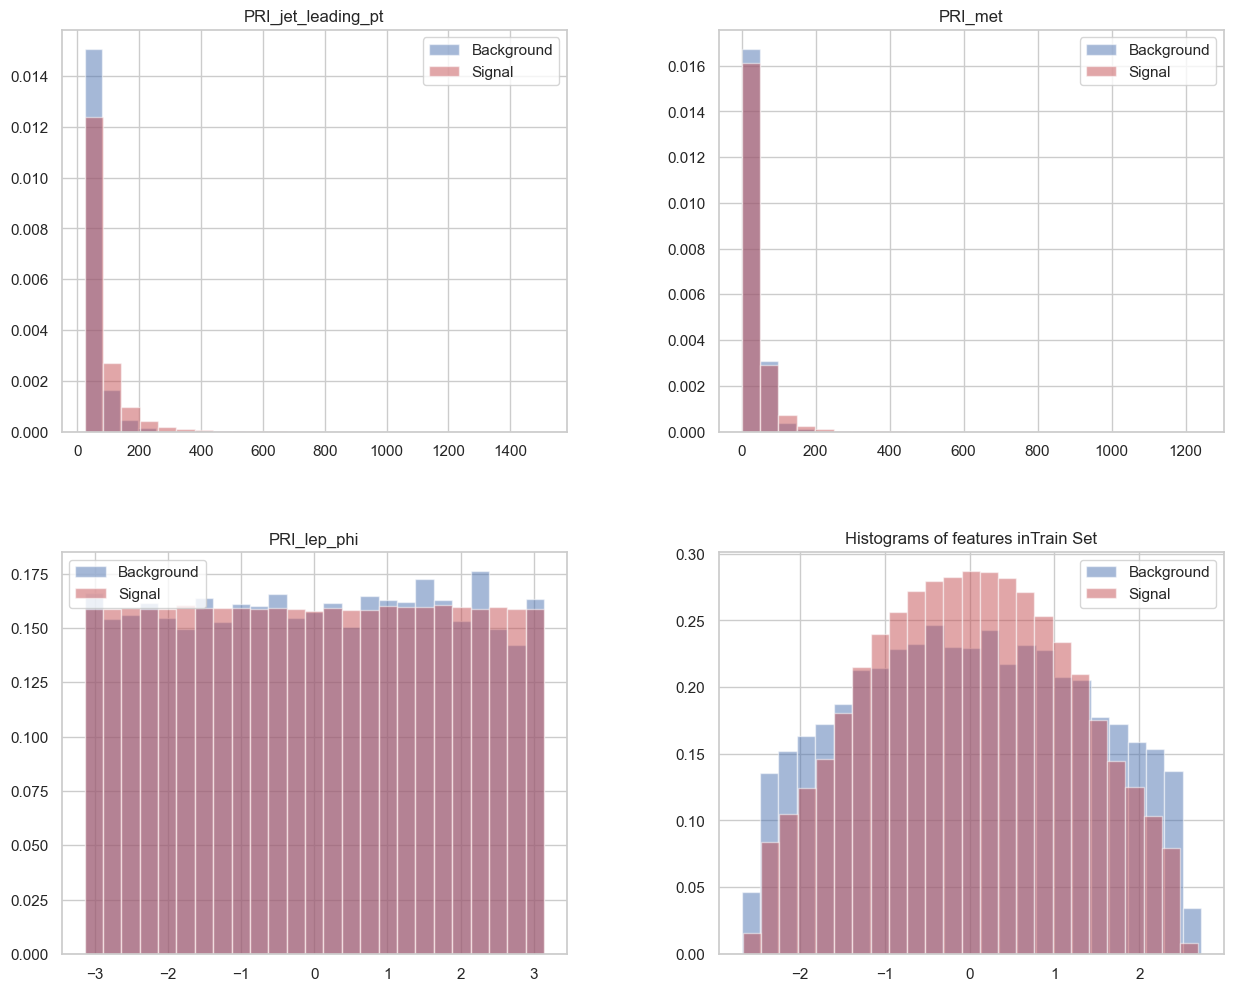

In [15]:
# Show data summary
train_visualize.histogram_dataset()

diboson (147729,)
diboson (147729,)
htautau (30,)
ttbar (189157,)
ttbar (189157,)
wjets (1958,)
wjets (1958,)
ztautau (520227,)
ztautau (520227,)


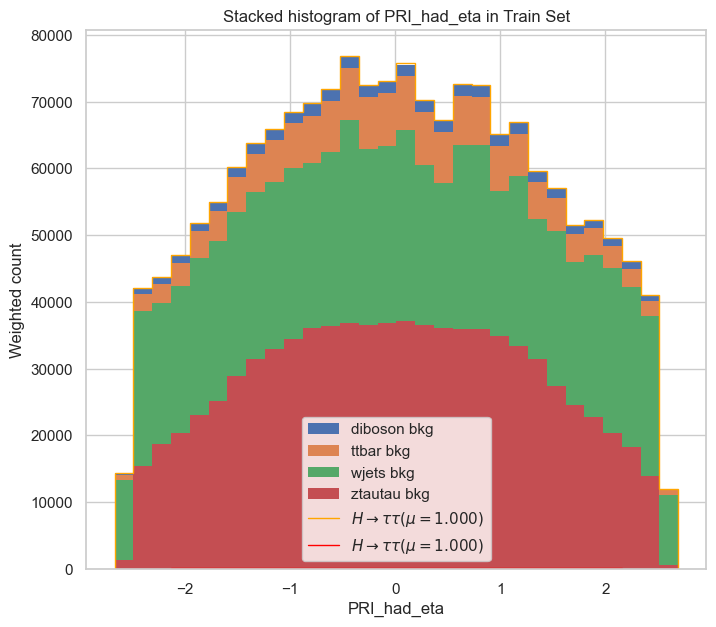

In [16]:
train_visualize.stacked_histogram("PRI_had_eta")

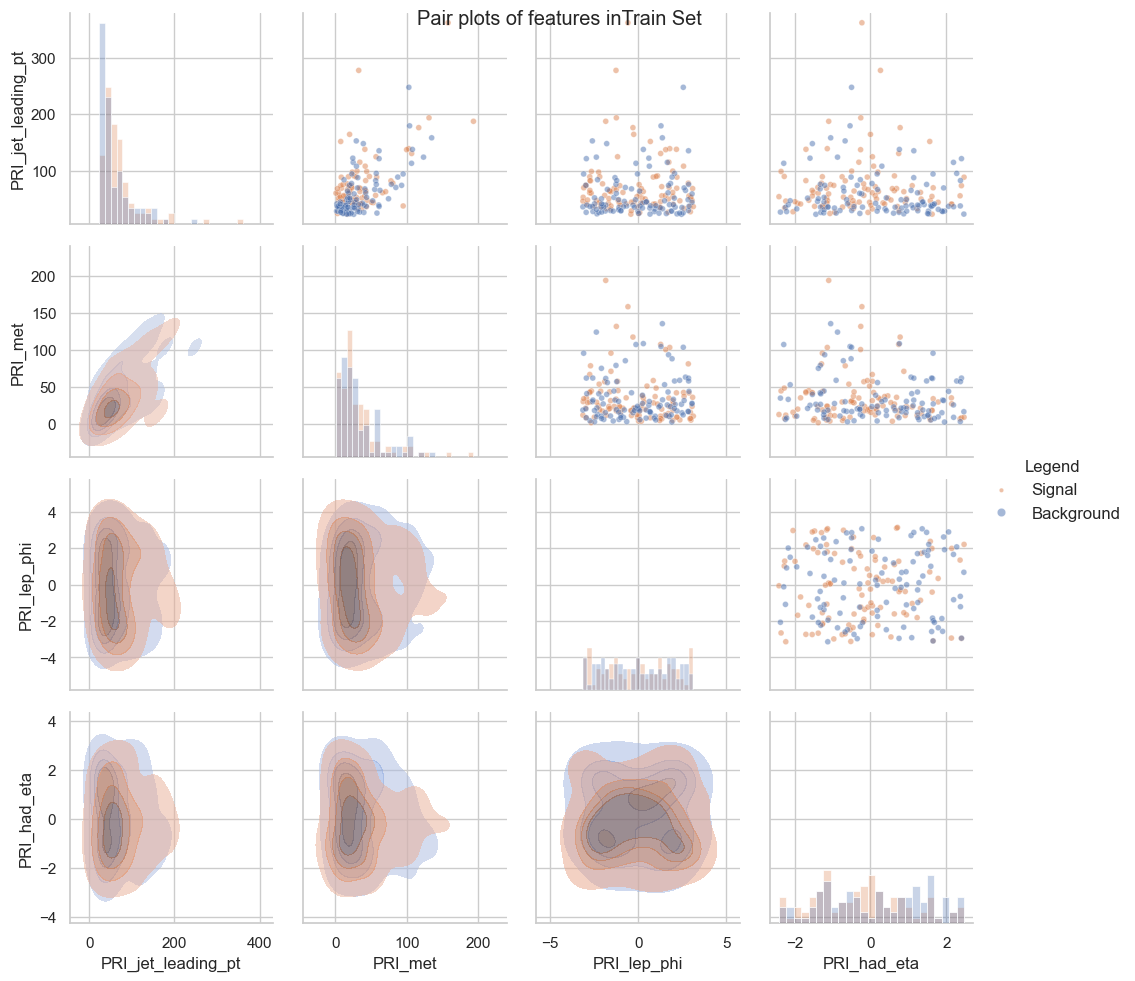

In [17]:
# Show data summary
train_visualize.pair_plots(sample_size=100)

In [18]:
syst_train_data = data.get_syst_train_set()

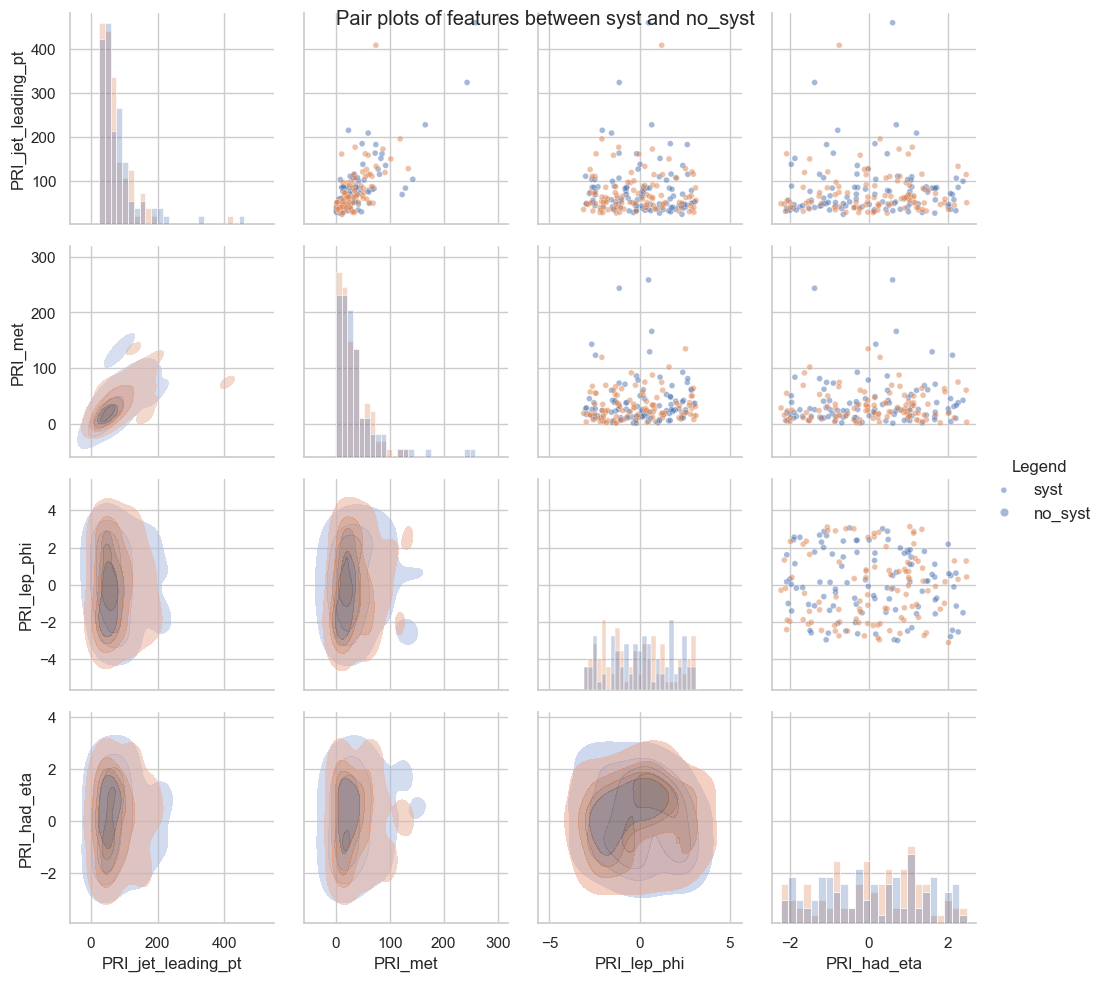

In [19]:
# Pair plots of train set with systematics
train_visualize.pair_plots_syst(syst_train_data["data"], sample_size=100)

In [20]:
bootstraped_data = data.generate_psuedo_exp_data()

In [21]:
# Show data summary
train_visualize.examine_dataset()

[*] --- Dataset name : Train Set
[*] --- Number of events : 5092469
[*] --- Number of features : 16
   diboson   40589.999999999985
   htautau   3638.9999999999995
   ttbar   158761.0
   wjets   710190.0
   ztautau   823327.000000002
[*] --- Number of signal events : 4233398
[*] --- Number of background events : 859071
[*] --- Examples of all features


,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_had_pt,PRI_had_eta,PRI_had_phi,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_n_jets,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,PRI_met,PRI_met_phi
0,33.716999,-0.009,-1.614,42.567001,0.391,1.512,42.567001,0.391,1.512,-7.000000,-7.000,-7.000,-7.0,42.567001,18.089001,-2.276
1,39.069000,-0.382,2.876,45.743000,0.369,-0.165,45.743000,0.369,-0.165,-7.000000,-7.000,-7.000,-7.0,45.743000,11.859000,0.983
2,26.211000,0.736,-2.294,43.819000,0.565,0.889,43.819000,0.565,0.889,-7.000000,-7.000,-7.000,-7.0,43.819000,8.625000,-0.087
3,55.631001,-0.277,1.425,46.077999,0.190,-1.295,49.319000,1.085,3.036,46.077999,0.190,-1.295,-1.0,95.397003,33.098999,-0.798
4,96.626999,0.548,2.112,64.114998,-2.041,-2.114,64.114998,-2.041,-2.114,24.503000,-0.549,-0.182,1.0,88.617996,36.653000,0.112


[*] --- Description of all features


,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_had_pt,PRI_had_eta,PRI_had_phi,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_n_jets,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,PRI_met,PRI_met_phi
count,5.092469e+06,5.092469e+06,5.092469e+06,5.092469e+06,5.092469e+06,5.092469e+06,5.092469e+06,5.092469e+06,5.092469e+06,5.092469e+06,5.092469e+06,5.092469e+06,5.092469e+06,5.092469e+06,5.092469e+06,5.092469e+06
mean,4.003889e+01,3.858527e-04,1.411100e-03,5.060156e+01,-2.031973e-04,4.236645e-05,7.440759e+01,-4.607605e-04,-5.000156e-04,3.284827e+01,-2.396695e+00,-2.394841e+00,-2.391500e+00,1.353792e+02,3.529773e+01,4.084664e-04
std,2.391802e+01,1.173759e+00,1.813462e+00,2.758819e+01,1.204013e+00,1.813305e+00,5.838182e+01,1.548444e+00,1.812557e+00,4.031150e+01,3.648207e+00,3.631156e+00,3.432812e+00,1.260422e+02,3.613332e+01,1.812719e+00
min,2.000000e+01,-2.500000e+00,-3.142000e+00,2.285000e+01,-2.688000e+00,-3.142000e+00,2.287800e+01,-4.962000e+00,-3.142000e+00,-7.000000e+00,-7.000000e+00,-7.000000e+00,-9.000000e+00,2.287800e+01,4.000000e-03,-3.142000e+00
25%,2.583700e+01,-8.920000e-01,-1.569000e+00,3.388300e+01,-9.250000e-01,-1.570000e+00,4.106400e+01,-1.115000e+00,-1.572000e+00,-7.000000e+00,-7.000000e+00,-7.000000e+00,-7.000000e+00,5.101600e+01,1.367700e+01,-1.570000e+00
50%,3.332000e+01,0.000000e+00,2.000000e-03,4.432200e+01,-1.000000e-03,0.000000e+00,5.536500e+01,-2.000000e-03,-1.000000e-03,3.107000e+01,-1.370000e+00,-1.631000e+00,-1.000000e+00,9.081100e+01,2.442200e+01,0.000000e+00
75%,4.544400e+01,8.930000e-01,1.573000e+00,5.823600e+01,9.250000e-01,1.570000e+00,8.352900e+01,1.114000e+00,1.570000e+00,5.052200e+01,5.960000e-01,7.760000e-01,0.000000e+00,1.760850e+02,4.313600e+01,1.571000e+00
max,1.261630e+03,2.500000e+00,3.142000e+00,1.260630e+03,2.728000e+00,3.142000e+00,1.509400e+03,4.962000e+00,3.142000e+00,1.276360e+03,4.998000e+00,3.142000e+00,1.000000e+01,3.542470e+03,1.242130e+03,3.142000e+00


***
### Program
***


In [22]:

from HiggsML.ingestion import Ingestion

ingestion = Ingestion(data)


In [23]:

# initialize submission
ingestion.init_submission(Model)

[*] Initializing Submmited Model
[*] Loading Train data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5092469 entries, 0 to 5092468
Columns: 16 entries, PRI_lep_pt to PRI_met_phi
dtypes: float32(16)
memory usage: 310.8 MB
None
[*] Train data loaded successfully
Full data:  (5092469, 16)
Full Labels:  (5092469,)
Full Weights:  (5092469,)
sum_signal_weights:  3638.9999999999995
sum_bkg_weights:  1732868.0000000019
 
 
Training Data:  (3772381, 16)
Training Labels:  (3772381,)
Training Weights:  (3772381,)
sum_signal_weights:  3638.999999999999
sum_bkg_weights:  1732868.0000000016

Valid Data:  (1527740, 16)
Valid Labels:  (1527740,)
Valid Weights:  (1527740,)
sum_signal_weights:  3639.0000000000014
sum_bkg_weights:  1732868.0000000028
 
 
Training Data:  (3772381, 17)
Model is BDT


[*] Calling fit method of submitted model
Score plus syst:  (3627827,)
Score minus syst:  (3488855,)
Train Results: 
	 mu_hat  :  -1.1269536586998532
	 del_mu_stat  :  0.0025635903851893753
	 del_mu_sys  :  0.11269536586998533
	 del_mu_tot  :  0.056362260166340224
Valid Results: 
	 mu_hat  :  -0.8539813776639955
	 del_mu_stat  :  0.0025635903851893753
	 del_mu_sys  :  0.08539813776639955
	 del_mu_tot  :  0.042718303833462284
[*] --- Dataset name : Train Set
[*] --- Number of events : 1527740
[*] --- Number of features : 18
   diboson   40952.5938561248
   htautau   3639.0000000000014
   ttbar   159469.8002728067
   wjets   706605.74872419
   ztautau   825839.8571468806
[*] --- Number of signal events : 1269499
[*] --- Number of background events : 258241
[*] --- Examples of all features


,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_had_pt,PRI_had_eta,PRI_had_phi,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_n_jets,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,PRI_met,PRI_met_phi,derived_feature,score
1692743,34.942001,-0.433,2.243,69.704002,0.444,-2.940,163.395004,1.988,-0.401,69.704002,0.444,-2.94,-1.0,233.098999,89.195000,2.696,104.646004,0.951381
4304572,38.271000,0.222,0.269,43.549999,-0.275,2.997,43.549999,-0.275,2.997,-7.000000,-7.000,-7.00,-7.0,43.549999,18.729000,1.390,81.820999,0.724076
4926484,21.878000,1.737,0.457,48.679001,1.131,-2.124,48.679001,1.131,-2.124,-7.000000,-7.000,-7.00,-7.0,48.679001,13.538000,1.370,70.556999,0.279315
2234489,45.689999,-1.705,0.991,32.583000,-0.724,-2.332,32.583000,-0.724,-2.332,-7.000000,-7.000,-7.00,-7.0,32.583000,33.861000,-2.077,78.272995,0.547733
1570006,29.891001,-0.980,2.187,29.225000,-0.000,-0.801,29.225000,-0.000,-0.801,-7.000000,-7.000,-7.00,-7.0,29.225000,22.646999,-1.120,59.116001,0.199208


[*] --- Description of all features


,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_had_pt,PRI_had_eta,PRI_had_phi,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_n_jets,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,PRI_met,PRI_met_phi,derived_feature,score
count,1.527740e+06,1.527740e+06,1.527740e+06,1.527740e+06,1.527740e+06,1.527740e+06,1.527740e+06,1.527740e+06,1.527740e+06,1.527740e+06,1.527740e+06,1.527740e+06,1.527740e+06,1.527740e+06,1.527740e+06,1.527740e+06,1.527740e+06,1.527740e+06
mean,4.002517e+01,-9.201437e-04,3.177666e-03,5.058947e+01,-1.869367e-03,-3.469404e-04,7.437218e+01,-1.747891e-03,1.456342e-04,3.284665e+01,-2.398266e+00,-2.397638e+00,-2.392606e+00,1.354007e+02,3.526579e+01,9.191708e-04,9.061462e+01,6.678072e-01
std,2.382603e+01,1.173880e+00,1.812315e+00,2.758753e+01,1.204004e+00,1.813716e+00,5.843981e+01,1.547764e+00,1.813373e+00,4.032782e+01,3.649444e+00,3.631424e+00,3.434304e+00,1.262242e+02,3.616673e+01,1.811447e+00,3.831127e+01,2.547655e-01
min,2.000000e+01,-2.500000e+00,-3.142000e+00,2.285000e+01,-2.683000e+00,-3.142000e+00,2.292800e+01,-4.962000e+00,-3.142000e+00,-7.000000e+00,-7.000000e+00,-7.000000e+00,-8.000000e+00,2.292800e+01,4.000000e-03,-3.142000e+00,4.299800e+01,7.390718e-05
25%,2.583100e+01,-8.940000e-01,-1.564000e+00,3.388100e+01,-9.280000e-01,-1.569000e+00,4.104000e+01,-1.116000e+00,-1.572000e+00,-7.000000e+00,-7.000000e+00,-7.000000e+00,-7.000000e+00,5.094400e+01,1.365200e+01,-1.566000e+00,6.760300e+01,4.738124e-01
50%,3.331200e+01,-1.000000e-03,2.000000e-03,4.431300e+01,-3.000000e-03,-2.000000e-03,5.533000e+01,-5.000000e-03,-2.000000e-03,3.106700e+01,-1.373000e+00,-1.634000e+00,-1.000000e+00,9.073000e+01,2.438000e+01,1.000000e-03,8.212700e+01,7.430531e-01
75%,4.542400e+01,8.920000e-01,1.574000e+00,5.820900e+01,9.230000e-01,1.569000e+00,8.339200e+01,1.111000e+00,1.573000e+00,5.058025e+01,5.960000e-01,7.740000e-01,0.000000e+00,1.761690e+02,4.310300e+01,1.570000e+00,1.011970e+02,8.886690e-01
max,6.834670e+02,2.500000e+00,3.142000e+00,1.083730e+03,2.697000e+00,3.142000e+00,1.403050e+03,4.922000e+00,3.142000e+00,1.041600e+03,4.982000e+00,3.142000e+00,9.000000e+00,2.450140e+03,1.227240e+03,3.142000e+00,1.451269e+03,9.985144e-01


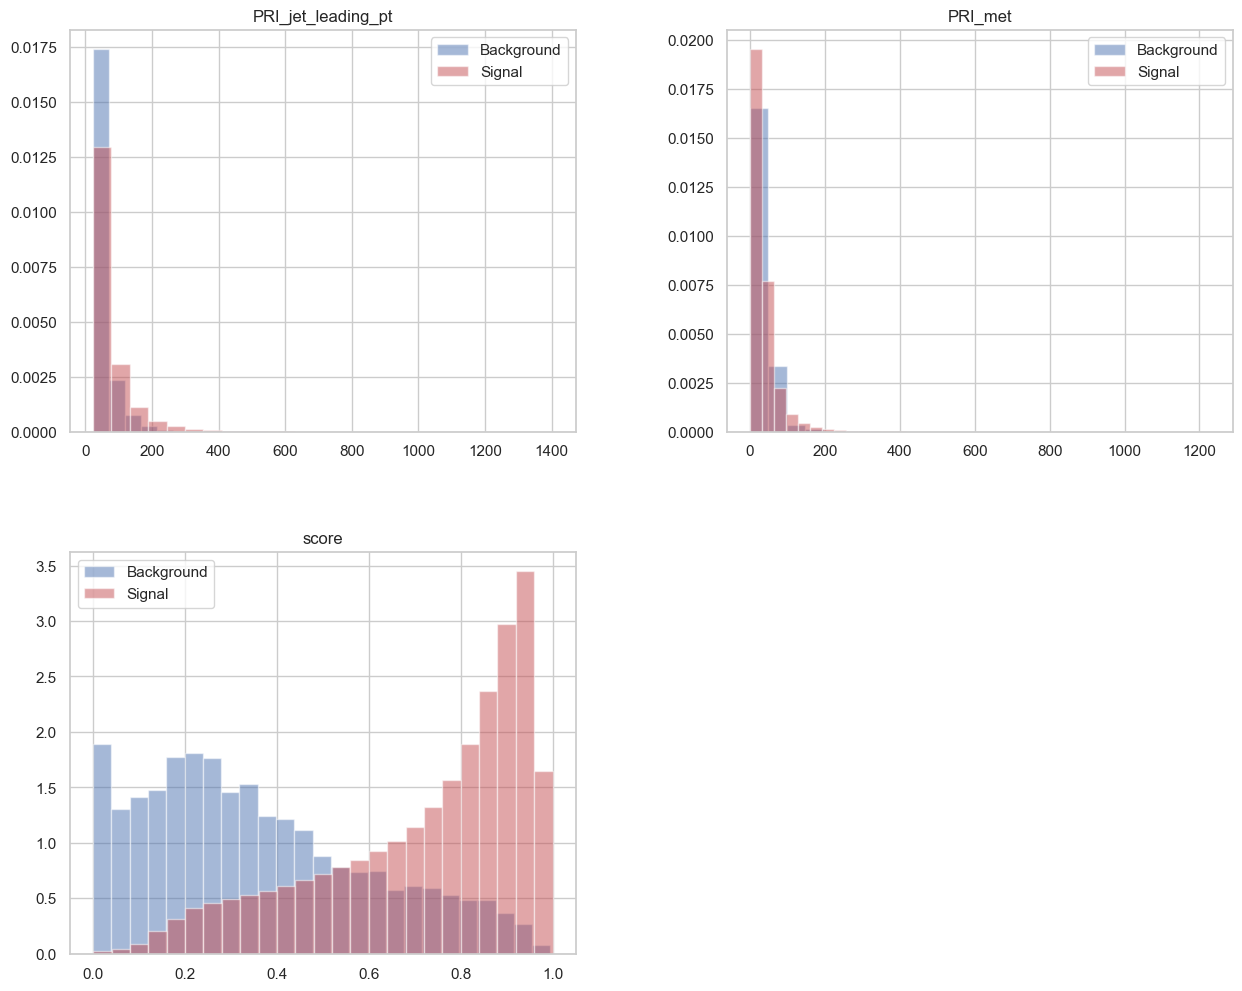

diboson (44626,)
diboson (44626,)
htautau (30,)
ttbar (56863,)
ttbar (56863,)
wjets (583,)
wjets (583,)
ztautau (156169,)
ztautau (156169,)


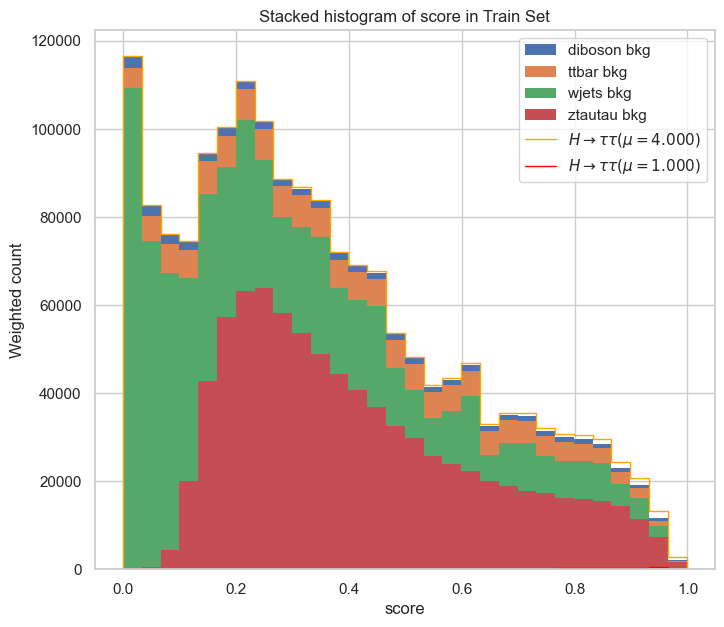

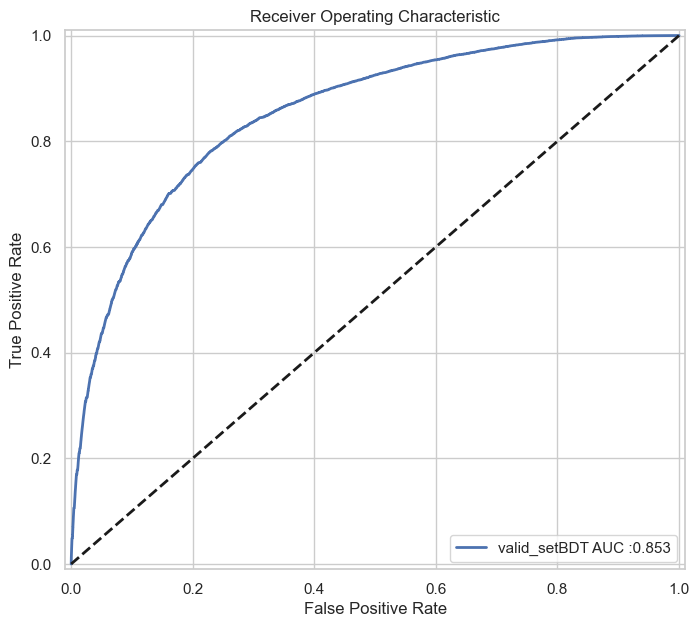

In [24]:

# fit submission
ingestion.fit_submission()

In [25]:

# load test set
data.load_test_set()

[*] Loading Test data
[*] Test data loaded successfully


In [26]:

# predict submission
ingestion.predict_submission(test_settings)

[*] Calling predict method of submitted model


Test Results:  {'mu_hat': -0.9731859365398516, 'del_mu_stat': 0.0025635903851893753, 'del_mu_sys': 0.09731859365398517, 'del_mu_tot': 0.04867617658170297}
Test Results:  {'mu_hat': -1.0916787953321492, 'del_mu_stat': 0.0025635903851893753, 'del_mu_sys': 0.10916787953321493, 'del_mu_tot': 0.05459898789685016}
Test Results:  {'mu_hat': -0.9060644179227129, 'del_mu_stat': 0.0025635903851893753, 'del_mu_sys': 0.09060644179227129, 'del_mu_tot': 0.04532135062506214}
Test Results:  {'mu_hat': -1.0418821907147333, 'del_mu_stat': 0.0025635903851893753, 'del_mu_sys': 0.10418821907147334, 'del_mu_tot': 0.0521098766764717}
Test Results:  {'mu_hat': -0.8906176733987259, 'del_mu_stat': 0.0025635903851893753, 'del_mu_sys': 0.08906176733987259, 'del_mu_tot': 0.044549327709193974}
Test Results:  {'mu_hat': -1.0535038894593138, 'del_mu_stat': 0.0025635903851893753, 'del_mu_sys': 0.10535038894593139, 'del_mu_tot': 0.05269078773068889}
Test Results:  {'mu_hat': -0.9195054494874936, 'del_mu_stat': 0.002563

In [27]:
ingestion.compute_result()

[*] Saving ingestion result


In [28]:

# save result
ingestion.save_result(output_dir)

## Score
1. Compute Scores
2. Visualize Scores


In [29]:
from HiggsML.score import Scoring

In [30]:
# Initialize Score
score = Scoring()

In [31]:
print(output_dir)
score.load_ingestion_results(prediction_dir = output_dir)

/home/chakkappai/Work/ST4_CS/Collaboration_A/sample_result_submission
[*] Reading predictions
[✔]


[*] Computing scores
[*]  [{'mu_hats': [-0.9731859365398516, -1.0535038894593138], 'delta_mu_hats': [0.04867617658170297, 0.05269078773068889], 'p16': [-1.0218621131215546, -1.1061946771900026], 'p84': [-0.9245097599581487, -1.000813101728625]}, {'mu_hats': [-0.9060644179227129, -1.058137806909818], 'delta_mu_hats': [0.04532135062506214, 0.05292241533552259], 'p16': [-0.951385768547775, -1.1110602222453405], 'p84': [-0.8607430672976507, -1.0052153915742954]}, {'mu_hats': [-0.9148884041097083, -0.9728062041486979], 'delta_mu_hats': [0.045762375144345176, 0.04865719654882774], 'p16': [-0.9606507792540535, -1.0214634006975256], 'p84': [-0.8691260289653631, -0.9241490075998702]}, {'mu_hats': [-0.9195054494874936, -0.8906176733987259], 'delta_mu_hats': [0.04599313729252173, 0.044549327709193974], 'p16': [-0.9654985867800153, -0.9351670011079198], 'p84': [-0.8735123121949718, -0.8460683456895319]}, {'mu_hats': [-1.0916787953321492, -1.0418821907147333], 'delta_mu_hats': [0.05459898789685016,

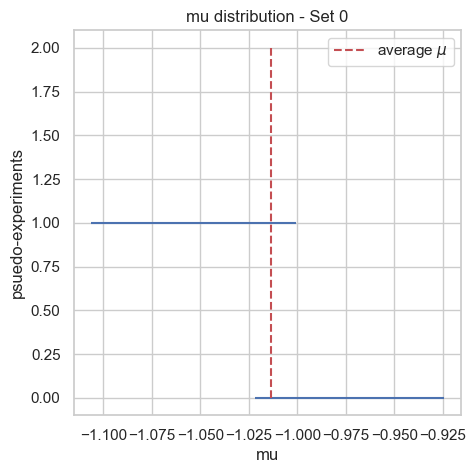

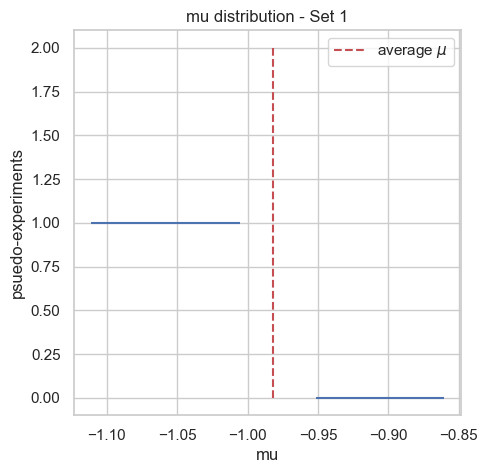

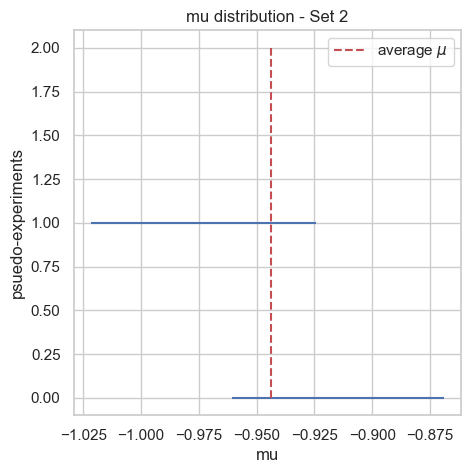

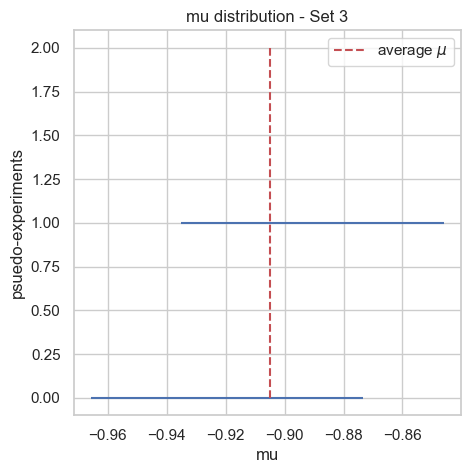

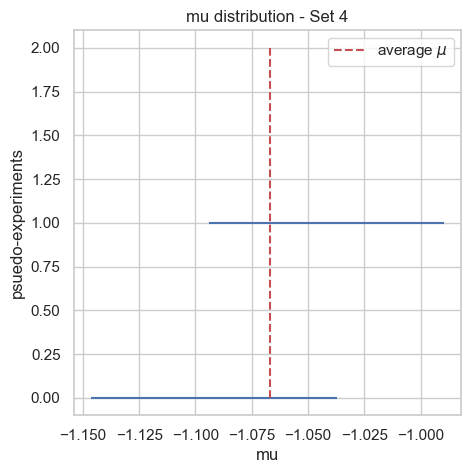

In [32]:
# Compute Score
score.compute_scores(test_settings)

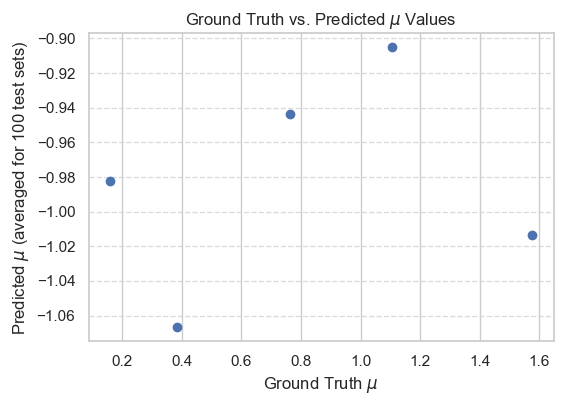

In [33]:
# Visualize scatter plot of ground truth mu and predicted mu
visualization.visualize_scatter(ingestion_result_dict=ingestion.results_dict, 
                  ground_truth_mus=test_settings["ground_truth_mus"])

***
# Submissions
***

### **Unit Testing**

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. All you have to do to make a submission is modify the file <code>model.py</code> in the <code>sample_code_submission/</code> directory, then run this test to make sure everything works fine. This is the actual program that will be run on the server to test your submission.
<br>
Keep the sample code simple.<br>

<code>python3</code> is required for this step

### **Test Ingestion Program**
⚠️ Note: Ingestion program runs by default a small dataset. To run it on public data set `USE_PUBLIC_DATA = True`

In [34]:
!python3 run_ingestion.py

[*] Initializing Submmited Model
[*] Loading Train data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5092469 entries, 0 to 5092468
Columns: 16 entries, PRI_lep_pt to PRI_met_phi
dtypes: float32(16)
memory usage: 310.8 MB
None
[*] Train data loaded successfully
Full data:  (5092469, 16)
Full Labels:  (5092469,)
Full Weights:  (5092469,)
sum_signal_weights:  3638.9999999999995
sum_bkg_weights:  1732868.0000000019
 
 
Training Data:  (3772381, 16)
Training Labels:  (3772381,)
Training Weights:  (3772381,)
sum_signal_weights:  3638.999999999999
sum_bkg_weights:  1732868.0000000016

Valid Data:  (1527740, 16)
Valid Labels:  (1527740,)
Valid Weights:  (1527740,)
sum_signal_weights:  3639.0000000000014
sum_bkg_weights:  1732868.0000000028
 
 
Training Data:  (3772381, 17)
Model is BDT
[*] Calling fit method of submitted model
Score plus syst:  (3627827,)
Score minus syst:  (3488855,)
Train Results: 
	 mu_hat  :  -1.1269536586998532
	 del_mu_stat  :  0.0025635903851893753
	 del_mu_sys  : 

### **Test Scoring Program**

In [35]:
!python3 run_scoring.py

Settings file not found. Please provide the settings file.


In [36]:
from zipfile import ZipFile, ZIP_DEFLATED
from contextlib import closing
# -------------------------------------
# Zip files
# -------------------------------------
def zipdir(archivename, basedir):
    '''Zip directory, from J.F. Sebastian http://stackoverflow.com/'''
    assert os.path.isdir(basedir)
    with closing(ZipFile(archivename, "w", ZIP_DEFLATED)) as z:
        for root, dirs, files in os.walk(basedir):
            # NOTE: ignore empty directories
            for fn in files:
                if fn[-4:] != '.zip' and fn != '.DS_Store':
                    absfn = os.path.join(root, fn)
                    zfn = absfn[len(basedir):]  # XXX: relative path
                    z.write(absfn, zfn)

### **Prepare the submission**

In [37]:
import datetime
the_date = datetime.datetime.now().strftime("%y-%m-%d-%H-%M")
code_submission = 'BlackSwan-code_submission_' + the_date + '.zip'
zipdir(code_submission, submission_dir)
print("Submit : " + code_submission + " to the competition")


Submit : BlackSwan-code_submission_24-05-28-16-10.zip to the competition
